## Setup

In [91]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Will need more for other models

## Loading data
Time series COVID-19 global data 

In [92]:
full_confirmed_table = pd.read_csv('./data/time_series_covid_19_confirmed.csv')
full_deaths_table = pd.read_csv('./data/time_series_covid_19_deaths.csv')
full_recovered_table = pd.read_csv('./data/time_series_covid_19_recovered.csv')

Calling the head function on confirmed_table displays the top 5 rows of the table. This can help us determine at which index the dates start and end. 
In this case only the first 4 columns are not dates, so this means the dates start from index 4 until the last index.

In [93]:
full_confirmed_table.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


Confirming the same is true for the two other tables:

In [94]:
full_deaths_table.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [95]:
full_recovered_table.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,10,17,17,31,31,33,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,65,65,24,65,29,29,31,31,37
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Get the column names as strings in a list (pandas index)
columns = full_confirmed_table.keys()

# Get columns from index 4 until the last index. This gets us the tables with the dates only.
confirmed_table = full_confirmed_table.loc[:, columns[4]:]
deaths_table = full_deaths_table.loc[:, columns[4]:]
recovered_table = full_recovered_table.loc[:, columns[4]:]

# Confirming table is clean
confirmed_table.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,0,0,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,0,0,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,0,0,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,0,0,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [97]:
# Add up all the cases for each day
# This will be the y variable for this simple model
total_cases_per_day = confirmed_table.sum(axis=0).to_numpy()
# An array going from 0 to the number of days will be the x variable
number_of_days = total_cases_per_day.shape[0]
day_number = np.arange(number_of_days)

# For readability, reshaped because there is currently only one feature
X = day_number.reshape(-1, 1)
y = total_cases_per_day.reshape(-1, 1)

# Unsure if splitting up data would be a good idea here because of the dataset. Commented out for now.
#Xtrain_confirmed, Xtest_confirmed, ytrain_confirmed, ytest_confirmed = train_test_split(X, y, test_size=0.2, shuffle=False)
Xtrain_confirmed, ytrain_confirmed = X, y

## Fitting the models to training data:

In [98]:
# We will be predicting for 20 (?) days into the future
days_into_future = 20
# Reshape because scikit complains when 1d arrays are passed.
new_x = np.arange(number_of_days + days_into_future).reshape(-1, 1)


linear_model = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                   ("lin_reg", LinearRegression())])
linear_model.fit(Xtrain_confirmed, ytrain_confirmed)
confirmed_prediction = linear_model.predict(new_x)

## Plotting the predictions

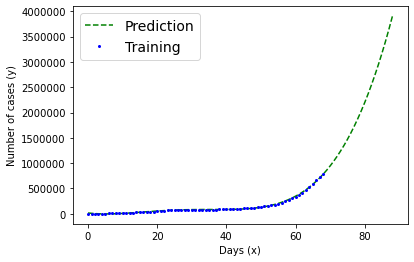

In [99]:
#plt.plot(Xtest_confirmed, ytest_confirmed, 'r.', markersize=4, label='Test')
plt.plot(new_x, confirmed_prediction, 'g--', label='Prediction')
plt.plot(Xtrain_confirmed, ytrain_confirmed, 'b.', markersize=4, label='Training')
plt.ticklabel_format(style='plain') # Stops values from showing up in scientic notation
plt.xlabel("Days (x)")
plt.ylabel("Number of cases (y)")
plt.legend(prop={'size': 14})
plt.show()

In [100]:
full_confirmed_table

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,5
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [101]:
# lets look at some countries individually
def plotCountry(country, X):
    countryTable = full_confirmed_table.loc[full_confirmed_table['Country/Region'] == country].loc[:, columns[4]:]
    countrySum = countryTable.sum(axis=0).to_numpy()
    countryModel = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                       ("lin_reg", LinearRegression())])
    countryModel.fit(X, countrySum)
    countryPrediction = countryModel.predict(new_x)
    plt.plot(new_x, countryPrediction, 'g--', label='Prediction')
    plt.plot(X, countrySum, 'b.', markersize=4, label='Training')
    plt.ticklabel_format(style='plain') # Stops values from showing up in scientic notation
    plt.xlabel("Days (x)")
    plt.ylabel("Number of cases (y)")
    plt.legend(prop={'size': 14})
    plt.title(country)
    plt.show()

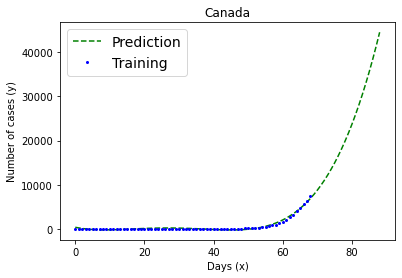

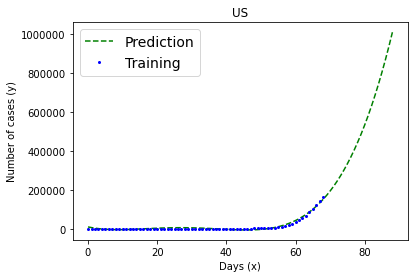

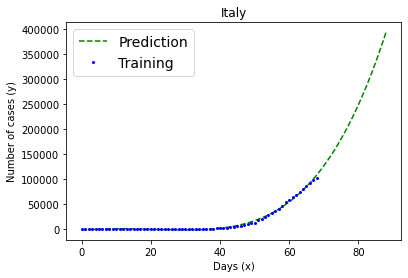

In [102]:
plotCountry("Canada", X)
plotCountry("US", X)
plotCountry("Italy", X)

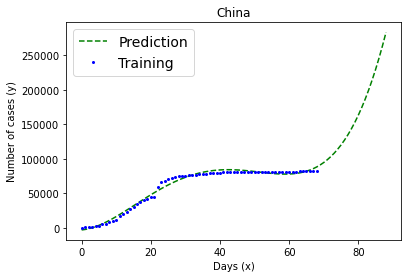

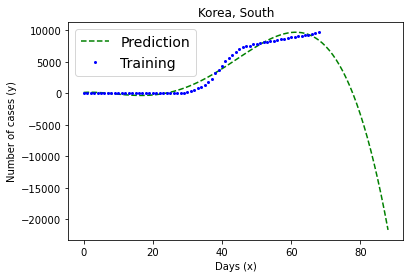

In [103]:
# The above 3 countries seem to be following exponential growth.
# lets try countries that seem to have had some success slowing the spread

plotCountry("China", X)
plotCountry("Korea, South", X)

We see that this simple model is making some flawed predictions here. In the case of China, it is predicting a sharp rise in cases with no reason other than that its the line that best fits the data. In the case of South Korea it is doing the same thing but this time the prediction is an impossible one, cases cannot go down since we are plotting the total cases not just the active cases.

To fix this we need to have our model give more weighting to the more recent days and to give it the constraint that a prediction should never be less than the previous day.

In [104]:
# feature matrix only consists of the day number, we need to add more information
# for now lets just add a second feature, the number of cases of the previous day

def addPreviousDaysToFeatures(country, X, daysToGoBack):
    # get country data
    countryTable = full_confirmed_table.loc[full_confirmed_table['Country/Region'] == country].loc[:, columns[4]:]
    countrySum = countryTable.sum(axis=0).to_numpy()
    for day in range(daysToGoBack):
        countrySum = countrySum[:-1]
        X = X[1:]
        X = np.c_[X,countrySum]
    return X

# add to the plotCountry function to now make it plot with knowledge of the case count of recent days

def plotCountry_v2(country, X, daysToGoBack, daysToPredict):
    # add features to X
    X = addPreviousDaysToFeatures(country, X, daysToGoBack)
    # adjust size of y
    countryTable = full_confirmed_table.loc[full_confirmed_table['Country/Region'] == country].loc[:, columns[4]:]
    countrySum = countryTable.sum(axis=0).to_numpy()
    countrySum = countrySum[daysToGoBack:]
    # train model
    countryModel = LinearRegression()
    countryModel.fit(X, countrySum)
    # adjust prediction input to match size of training matrix
    # take the last line of data(most recent date)
    X_last = X[-1]
    y_last = countrySum[-1]
    # remove oldest day and add newest day
    X_last = X_last[:-1]
    X_last = np.insert(X_last, 1, y_last)
    # make prediction then feed prediction back into itself to make new prediction
    countryPrediction = []
    for day in range(daysToPredict):
        prediction = countryModel.predict(X_last.reshape(1,-1))
        countryPrediction.append(prediction)
        X_last = X_last[:-1]
        X_last = np.insert(X_last, 1, prediction)
    # plot
    lastDayNumber = X[-1,0]
    plt.plot(np.arange(lastDayNumber+1,lastDayNumber+1+daysToPredict), countryPrediction, 'g--', label='Prediction')
    plt.plot(X[:,0], countrySum, 'b.', markersize=4, label='Training')
    plt.ticklabel_format(style='plain') # Stops values from showing up in scientic notation
    plt.xlabel("Days (x)")
    plt.ylabel("Number of cases (y)")
    plt.legend(prop={'size': 14})
    plt.title(country)
    plt.show()

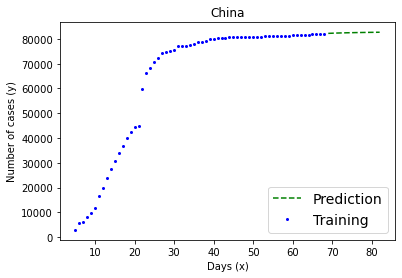

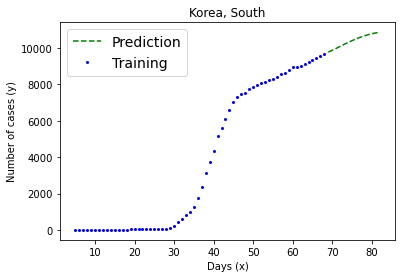

In [105]:
# plot those same countries again

daysToGoBack = 5
daysToPredict = 14
plotCountry_v2("China", X, daysToGoBack, daysToPredict)
plotCountry_v2("Korea, South", X, daysToGoBack, daysToPredict)

Repeat the initial process but this time use the change in new cases per day rather than the total.

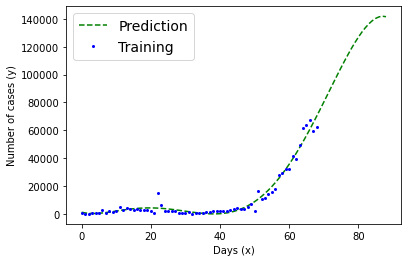

In [160]:
# Add up all the cases for each day
# This will be the y variable for this simple model
column_names = confirmed_table.columns
new_cases_per_day_table = confirmed_table.diff(axis=1)
new_cases_per_day_table.iloc[:, 0] = confirmed_table.iloc[:, 0]
new_cases_per_day = new_cases_per_day_table.sum(axis=0).to_numpy()

# An array going from 0 to the number of days will be the x variable
number_of_days = new_cases_per_day.shape[0]
day_number = np.arange(number_of_days)

# For readability, reshaped because there is currently only one feature
X = day_number.reshape(-1, 1)
y = new_cases_per_day.reshape(-1, 1)

# Unsure if splitting up data would be a good idea here because of the dataset. Commented out for now.
#Xtrain_confirmed, Xtest_confirmed, ytrain_confirmed, ytest_confirmed = train_test_split(X, y, test_size=0.2, shuffle=False)
Xtrain_confirmed, ytrain_confirmed = X, y

# We will be predicting for 20 (?) days into the future
days_into_future = 20
# Reshape because scikit complains when 1d arrays are passed.
new_x = np.arange(number_of_days + days_into_future).reshape(-1, 1)

linear_model = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                   ("lin_reg", LinearRegression())])
linear_model.fit(Xtrain_confirmed, ytrain_confirmed)
confirmed_prediction = linear_model.predict(new_x)

#plt.plot(Xtest_confirmed, ytest_confirmed, 'r.', markersize=4, label='Test')
plt.plot(new_x, confirmed_prediction, 'g--', label='Prediction')
plt.plot(Xtrain_confirmed, ytrain_confirmed, 'b.', markersize=4, label='Training')
plt.ticklabel_format(style='plain') # Stops values from showing up in scientic notation
plt.xlabel("Days (x)")
plt.ylabel("Number of cases (y)")
plt.legend(prop={'size': 14})
plt.show()

Next we'll modify the plotCountry() function to do the same

In [181]:
# Creates and plots prediction for the number of new cases per day
def plotCountry_v3(country, X):
    countryTable = full_confirmed_table.loc[full_confirmed_table['Country/Region'] == country].loc[:, columns[4]:] 
    countrySum = countryTable.sum(axis=0)
    countryDiff = countrySum.diff()
    countryDiff.iloc[0] = countrySum.iloc[0]
    countryDiffArray = countryDiff.to_numpy()
    countryModel = Pipeline([("poly_features", PolynomialFeatures(degree=7, include_bias=False)),
                       ("lin_reg", LinearRegression())])
    countryModel.fit(X, countryDiffArray)
    countryPrediction = countryModel.predict(new_x)
    plt.plot(new_x, countryPrediction, 'g--', label='Prediction')
    plt.plot(X, countryDiffArray, 'b.', markersize=4, label='Training')
    plt.ticklabel_format(style='plain') # Stops values from showing up in scientic notation
    plt.xlabel("Days (x)")
    plt.ylabel("Number of cases (y)")
    plt.legend(prop={'size': 14})
    plt.ylim(ymin=-10)
    plt.title(country)
    plt.show()

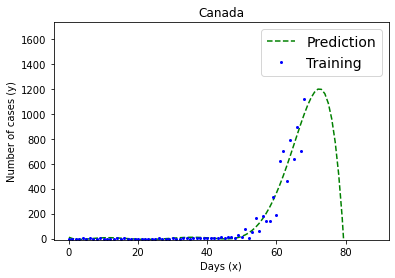

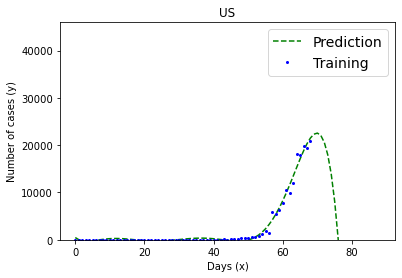

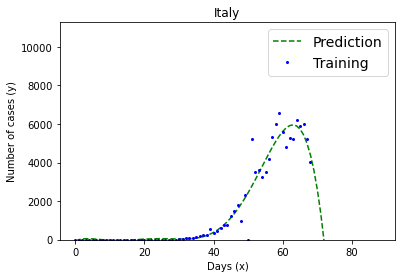

In [182]:
plotCountry_v3("Canada", X)
plotCountry_v3("US", X)
plotCountry_v3("Italy", X)

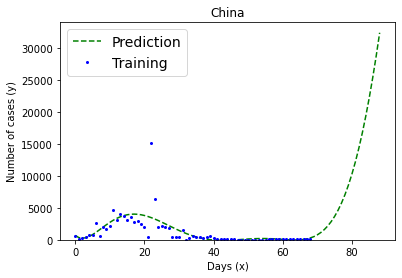

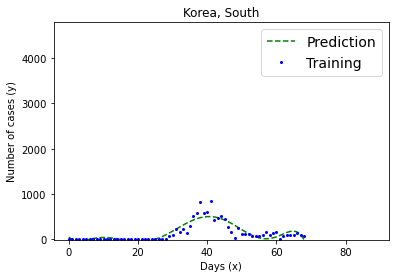

In [184]:
# The above 3 countries seem to be following exponential growth.
# lets try countries that seem to have had some success slowing the spread

plotCountry_v3("China", X)
plotCountry_v3("Korea, South", X)